Stock price prediction using multivariate data(Open, High, Low, Close, Volume)

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
df = pd.read_csv('TCS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,45.255402,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,43.190327,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,43.718178,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,42.421741,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,41.930927,2650800.0


In [ ]:
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Date,Open,High,Low,Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,2650800.0


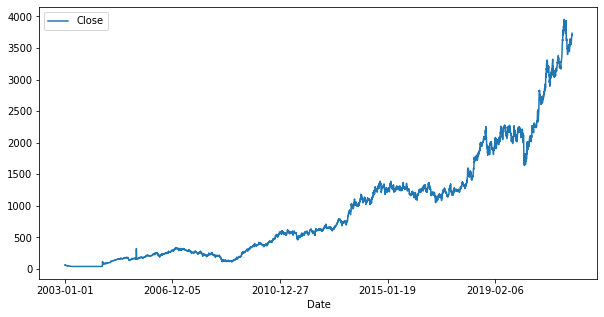

In [ ]:
df.plot(x='Date', y='Close', kind='line', figsize=(10, 5))

In [ ]:
dates = df.Date
df.drop(['Date'], inplace = True, axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,59.987499,61.974998,59.987499,61.087502,6027072.0
1,61.525002,62.924999,57.912498,58.299999,5325328.0
2,60.000000,61.049999,58.500000,59.012501,4198040.0
3,59.924999,60.187500,56.875000,57.262501,4121520.0
4,58.000000,58.500000,56.062500,56.599998,2650800.0


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)

In [ ]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaler2.fit_transform(df[['Close']])

array([[0.00579649],
       [0.0050847 ],
       [0.00526664],
       ...,
       [0.9366727 ],
       [0.93364675],
       [0.94361826]])

In [ ]:
data.shape

(4715, 5)

In [ ]:
trainSize = int(len(data)*0.7)
testSize = len(data) - trainSize
train = data[0:trainSize]
test = data[trainSize:len(data)]

In [ ]:
def modify(data, pastDays = 14):
  X = []
  Y = []
  for i in range(pastDays, len(data)):
      X.append(data[i - 14: i, 0: data.shape[1]])
      Y.append(data[i : i + 1, 3])
  return np.array(X), np.array(Y)

In [ ]:
trainX, trainY = modify(train)
testX, testY = modify(test)

RNN

In [ ]:
model1 = Sequential()
model1.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model1.add(SimpleRNN(200))
model1.add(Dense(trainY.shape[1]))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 200)               41200     
                                                                 
 dense_19 (Dense)            (None, 1)                 201       
                                                                 
Total params: 41,401
Trainable params: 41,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(trainX, trainY, validation_split = 0.2, epochs = 50)

Epoch 1/50
103/103 [==============================] - 3s 18ms/step - loss: 0.0081 - val_loss: 0.0102
Epoch 2/50
103/103 [==============================] - 1s 11ms/step - loss: 4.5019e-05 - val_loss: 0.0080
Epoch 3/50
103/103 [==============================] - 1s 10ms/step - loss: 3.1133e-05 - val_loss: 0.0061
Epoch 4/50
103/103 [==============================] - 1s 11ms/step - loss: 2.6278e-05 - val_loss: 0.0055
Epoch 5/50
103/103 [==============================] - 1s 12ms/step - loss: 2.5171e-05 - val_loss: 0.0039
Epoch 6/50
103/103 [==============================] - 1s 11ms/step - loss: 2.2268e-05 - val_loss: 0.0026
Epoch 7/50
103/103 [==============================] - 1s 15ms/step - loss: 2.7355e-05 - val_loss: 0.0033
Epoch 8/50
103/103 [==============================] - 2s 17ms/step - loss: 2.2637e-05 - val_loss: 0.0019
Epoch 9/50
103/103 [==============================] - 2s 18ms/step - loss: 2.1773e-05 - val_loss: 0.0022
Epoch 10/50
103/103 [==============================] - 2s 1

In [ ]:
trainPredict1 = model1.predict(trainX)
testPredict1 = model1.predict(testX)
trainPredict1 = scaler2.inverse_transform(trainPredict1)
testPredict1 = scaler2.inverse_transform(testPredict1)
trainY1 = scaler2.inverse_transform(trainY.reshape(-1, 1))
testY1 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [ ]:
mape1 = np.mean(np.abs((testY1 - testPredict1)/testY1))*100
mape1

2.4136739576933683

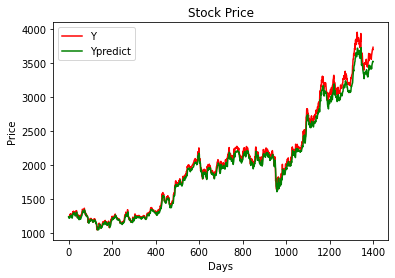

In [ ]:
days = [i for i in range(0, len(testY1))]
plt.plot(days, testY1, color='r', label='Y')
plt.plot(days, testPredict1, color='g', label='Ypredict')  
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

Classic LSTM

In [ ]:
model2 = Sequential()
model2.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model2.add(LSTM(200))
model2.add(Dense(trainY.shape[1]))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 200)               164800    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 165,001
Trainable params: 165,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(trainX, trainY, validation_split = 0.2, epochs = 50)

Epoch 1/50
103/103 [==============================] - 6s 42ms/step - loss: 8.0141e-04 - val_loss: 5.5499e-04
Epoch 2/50
103/103 [==============================] - 4s 37ms/step - loss: 2.2362e-05 - val_loss: 5.6483e-04
Epoch 3/50
103/103 [==============================] - 4s 37ms/step - loss: 2.2813e-05 - val_loss: 4.3628e-04
Epoch 4/50
103/103 [==============================] - 4s 38ms/step - loss: 2.1817e-05 - val_loss: 5.5762e-04
Epoch 5/50
103/103 [==============================] - 4s 38ms/step - loss: 2.2761e-05 - val_loss: 5.7299e-04
Epoch 6/50
103/103 [==============================] - 4s 38ms/step - loss: 2.2661e-05 - val_loss: 3.8164e-04
Epoch 7/50
103/103 [==============================] - 4s 39ms/step - loss: 2.1530e-05 - val_loss: 6.3123e-04
Epoch 8/50
103/103 [==============================] - 4s 38ms/step - loss: 2.5814e-05 - val_loss: 8.1084e-04
Epoch 9/50
103/103 [==============================] - 4s 39ms/step - loss: 2.1680e-05 - val_loss: 5.0984e-04
Epoch 10/50
103/103

In [ ]:
trainPredict2 = model2.predict(trainX)
testPredict2 = model2.predict(testX)
trainPredict2 = scaler2.inverse_transform(trainPredict2)
testPredict2 = scaler2.inverse_transform(testPredict2)
trainY2 = scaler2.inverse_transform(trainY.reshape(-1, 1))
testY2 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [ ]:
mape2 = np.mean(np.abs((testY2 - testPredict2)/testY2))*100
mape2

1.5727508208688714

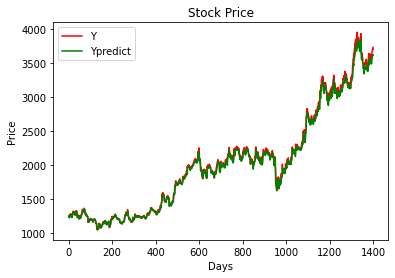

In [ ]:
days = [i for i in range(0, len(testY2))]
plt.plot(days, testY2, color='r', label='Y')
plt.plot(days, testPredict2, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

LSTM Peephole

In [ ]:
model3 = Sequential()
model3.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model3.add(RNN(tfa.rnn.PeepholeLSTMCell(200)))
model3.add(Dense(trainY.shape[1]))
model3.compile(optimizer='adam', loss='mse')
model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_3 (RNN)                 (None, 200)               165400    
                                                                 
 dense_21 (Dense)            (None, 1)                 201       
                                                                 
Total params: 165,601
Trainable params: 165,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.fit(trainX, trainY, validation_split = 0.2, epochs = 50)

Epoch 1/50
103/103 [==============================] - 6s 40ms/step - loss: 5.2655e-04 - val_loss: 3.3286e-04
Epoch 2/50
103/103 [==============================] - 4s 37ms/step - loss: 2.3802e-05 - val_loss: 3.0666e-04
Epoch 3/50
103/103 [==============================] - 4s 37ms/step - loss: 2.2862e-05 - val_loss: 4.5657e-04
Epoch 4/50
103/103 [==============================] - 4s 38ms/step - loss: 2.1568e-05 - val_loss: 3.1356e-04
Epoch 5/50
103/103 [==============================] - 4s 38ms/step - loss: 2.2374e-05 - val_loss: 4.9554e-04
Epoch 6/50
103/103 [==============================] - 4s 37ms/step - loss: 2.0969e-05 - val_loss: 3.0968e-04
Epoch 7/50
103/103 [==============================] - 4s 37ms/step - loss: 2.0169e-05 - val_loss: 4.1578e-04
Epoch 8/50
103/103 [==============================] - 4s 36ms/step - loss: 2.2084e-05 - val_loss: 4.4208e-04
Epoch 9/50
103/103 [==============================] - 4s 37ms/step - loss: 2.1649e-05 - val_loss: 3.9037e-04
Epoch 10/50
103/103

In [ ]:
trainPredict3 = model3.predict(trainX)
testPredict3 = model3.predict(testX)
trainPredict3 = scaler2.inverse_transform(trainPredict3)
testPredict3 = scaler2.inverse_transform(testPredict3)
trainY3 = scaler2.inverse_transform(trainY.reshape(-1, 1))
testY3 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [ ]:
mape3 = np.mean(np.abs((testY3 - testPredict3)/testY3))*100
mape3

1.3259473511623339

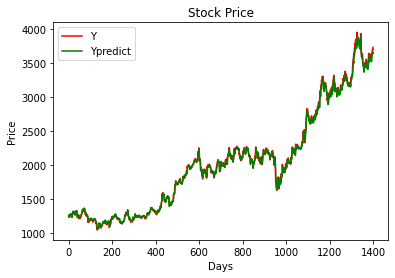

In [ ]:
days = [i for i in range(0, len(testY3))]
plt.plot(days, testY3, color='r', label='Y')
plt.plot(days, testPredict3, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

Bidirectional LSTM

In [ ]:
model4 = Sequential()
model4.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model4.add(Bidirectional(LSTM(200)))
model4.add(Dense(trainY.shape[1]))
model4.compile(optimizer='adam', loss='mse')
model4.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 400)              329600    
 nal)                                                            
                                                                 
 dense_22 (Dense)            (None, 1)                 401       
                                                                 
Total params: 330,001
Trainable params: 330,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.fit(trainX, trainY, validation_split = 0.2, epochs = 50)

Epoch 1/50
103/103 [==============================] - 11s 70ms/step - loss: 6.3718e-04 - val_loss: 5.0748e-04
Epoch 2/50
103/103 [==============================] - 6s 63ms/step - loss: 3.1046e-05 - val_loss: 4.7141e-04
Epoch 3/50
103/103 [==============================] - 7s 63ms/step - loss: 3.0807e-05 - val_loss: 6.0200e-04
Epoch 4/50
103/103 [==============================] - 6s 62ms/step - loss: 2.9809e-05 - val_loss: 5.6719e-04
Epoch 5/50
103/103 [==============================] - 6s 62ms/step - loss: 2.8884e-05 - val_loss: 4.5436e-04
Epoch 6/50
103/103 [==============================] - 6s 63ms/step - loss: 2.7842e-05 - val_loss: 8.8342e-04
Epoch 7/50
103/103 [==============================] - 6s 63ms/step - loss: 2.9093e-05 - val_loss: 7.7402e-04
Epoch 8/50
103/103 [==============================] - 7s 63ms/step - loss: 2.5245e-05 - val_loss: 4.0517e-04
Epoch 9/50
103/103 [==============================] - 6s 62ms/step - loss: 2.6132e-05 - val_loss: 5.4665e-04
Epoch 10/50
103/10

In [ ]:
trainPredict4 = model4.predict(trainX)
testPredict4 = model4.predict(testX)
trainPredict4 = scaler2.inverse_transform(trainPredict4)
testPredict4 = scaler2.inverse_transform(testPredict4)
trainY4 = scaler2.inverse_transform(trainY.reshape(-1, 1))
testY4 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [ ]:
mape4 = np.mean(np.abs((testY4 - testPredict4)/testY4))*100
mape4

1.9747483293318608

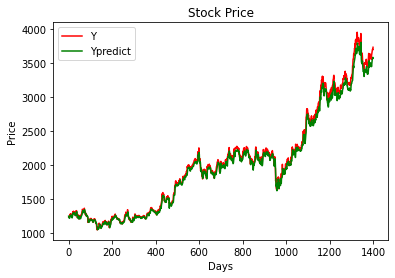

In [ ]:
days = [i for i in range(0, len(testY4))]
plt.plot(days, testY4, color='r', label='Y')
plt.plot(days, testPredict4, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

GRU(Gated Recurrent Unit)

In [ ]:
model5 = Sequential()
model5.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model5.add(GRU(200))
model5.add(Dense(trainY.shape[1]))
model5.compile(optimizer='adam', loss='mse')
model5.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 200)               124200    
                                                                 
 dense_23 (Dense)            (None, 1)                 201       
                                                                 
Total params: 124,401
Trainable params: 124,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.fit(trainX, trainY, validation_split = 0.2, epochs = 50)

Epoch 1/50
103/103 [==============================] - 6s 35ms/step - loss: 6.2346e-04 - val_loss: 1.4771e-04
Epoch 2/50
103/103 [==============================] - 3s 31ms/step - loss: 1.5605e-05 - val_loss: 1.4897e-04
Epoch 3/50
103/103 [==============================] - 3s 30ms/step - loss: 1.6147e-05 - val_loss: 1.3630e-04
Epoch 4/50
103/103 [==============================] - 3s 30ms/step - loss: 1.5244e-05 - val_loss: 1.7361e-04
Epoch 5/50
103/103 [==============================] - 3s 30ms/step - loss: 1.5416e-05 - val_loss: 1.5044e-04
Epoch 6/50
103/103 [==============================] - 3s 31ms/step - loss: 1.5323e-05 - val_loss: 1.2723e-04
Epoch 7/50
103/103 [==============================] - 3s 31ms/step - loss: 1.4396e-05 - val_loss: 1.2892e-04
Epoch 8/50
103/103 [==============================] - 3s 30ms/step - loss: 1.4807e-05 - val_loss: 1.3416e-04
Epoch 9/50
103/103 [==============================] - 3s 31ms/step - loss: 1.3908e-05 - val_loss: 1.1258e-04
Epoch 10/50
103/103

In [ ]:
trainPredict5 = model5.predict(trainX)
testPredict5 = model5.predict(testX)
trainPredict5 = scaler2.inverse_transform(trainPredict5)
testPredict5 = scaler2.inverse_transform(testPredict5)
trainY5 = scaler2.inverse_transform(trainY.reshape(-1, 1))
testY5 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [ ]:
mape5 = np.mean(np.abs((testY5 - testPredict5)/testY5))*100
mape5

1.3356250996796177

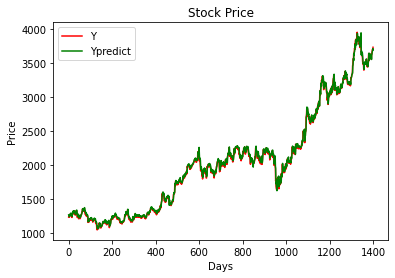

In [ ]:
days = [i for i in range(0, len(testY5))]
plt.plot(days, testY5, color='r', label='Y')
plt.plot(days, testPredict5, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()

Bidirection GRU

In [ ]:
model6 = Sequential()
model6.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model6.add(Bidirectional(GRU(200)))
model6.add(Dense(trainY.shape[1]))
model6.compile(optimizer='adam', loss='mse')
model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 400)              248400    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 248,801
Trainable params: 248,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.fit(trainX, trainY, validation_split = 0.2, epochs = 50)

Epoch 1/50
103/103 [==============================] - 50s 115ms/step - loss: 7.0564e-04 - val_loss: 4.0517e-04
Epoch 2/50
103/103 [==============================] - 9s 89ms/step - loss: 2.8502e-05 - val_loss: 3.0406e-04
Epoch 3/50
103/103 [==============================] - 9s 87ms/step - loss: 2.5280e-05 - val_loss: 2.7212e-04
Epoch 4/50
103/103 [==============================] - 7s 64ms/step - loss: 2.5096e-05 - val_loss: 3.1622e-04
Epoch 5/50
103/103 [==============================] - 10s 99ms/step - loss: 2.2819e-05 - val_loss: 2.5454e-04
Epoch 6/50
103/103 [==============================] - 9s 90ms/step - loss: 2.1052e-05 - val_loss: 1.8372e-04
Epoch 7/50
103/103 [==============================] - 9s 90ms/step - loss: 1.8635e-05 - val_loss: 2.8628e-04
Epoch 8/50
103/103 [==============================] - 9s 88ms/step - loss: 1.6349e-05 - val_loss: 1.5206e-04
Epoch 9/50
103/103 [==============================] - 6s 55ms/step - loss: 1.5188e-05 - val_loss: 1.6180e-04
Epoch 10/50
103/

In [ ]:
trainPredict6 = model6.predict(trainX)
testPredict6 = model6.predict(testX)
trainPredict6 = scaler2.inverse_transform(trainPredict6)
testPredict6 = scaler2.inverse_transform(testPredict6)
trainY6 = scaler2.inverse_transform(trainY.reshape(-1, 1))
testY6 = scaler2.inverse_transform(testY.reshape(-1, 1))

In [ ]:
mape6 = np.mean(np.abs((testY6 - testPredict6)/testY6))*100
mape6

2.4484582881928696

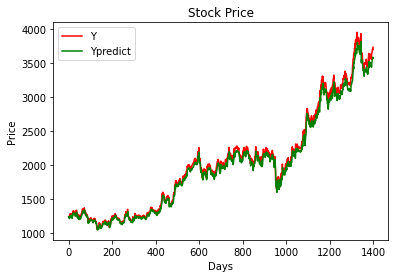

In [ ]:
days = [i for i in range(0, len(testY6))]
plt.plot(days, testY6, color='r', label='Y')
plt.plot(days, testPredict6, color='g', label='Ypredict')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price")
plt.legend()
plt.show()